# Deep Learning from scratch

### chapter 3

In [1]:
import numpy as np
import matplotlib.pylab as plt

## 시그모이드 함수
*  h(x) = 1/(1 + exp(-x))


## 계단함수
*  입력값을 경계로 출력이 바뀌는 함수

In [5]:
# 계단 함수 구현하기
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [7]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [9]:
y = x>0
y

array([False,  True,  True])

In [14]:
# dtype=int 로 사용
def step_function(x):
    return np.array(x > 0, dtype=int)

(-0.1, 1.1)

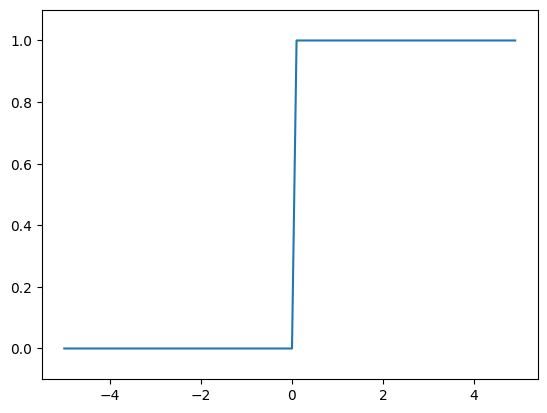

In [15]:
# 계단 함수의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
# plt.show()

In [16]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


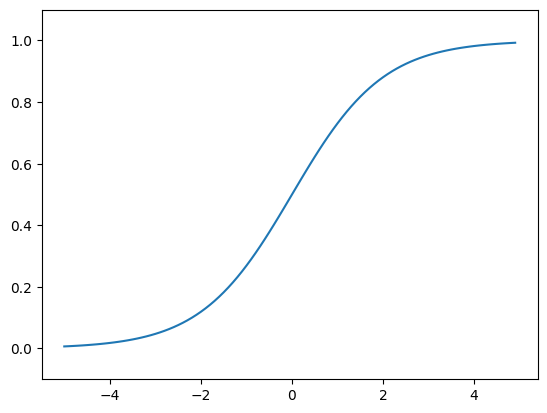

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## 비선형 함수
*  선형 함수는 은닉층이 없는 네트워크로 표현할 수 있다.
*  층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 비선형 함수를 사용해야 한다.

## ReLU 함수
*  Rectified Linear Unit - 입력이 0을 넘으면 입력 그대로, 아니면 0을 출력하는 함수

In [18]:
def relu(x):
    return np.maximum(0, x)

## 다차원 배열

In [19]:
# 다차원 배열
A = np.array([1, 2, 3, 4])
print(A)  # [1 2 3 4]
print(np.ndim(A))  # 1
print(A.shape)  # (4,)

[1 2 3 4]
1
(4,)


In [20]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))  # 2
print(B.shape)  # (3, 2)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [21]:
#  행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [23]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 신경망 구현
*  입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의
뉴런으로 구성.
  *  1, 2층의 활성화 함수 : 시그모이드
  *  3층의 활성화 함수 : 항등함수

*  출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
  *  ex) 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

In [24]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
# 항등함수
def identity_function(x):
    return x


In [26]:
# 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


## 출력층 설계
기계학습 문제는 분류classification와
회귀regression로 나뉜다.
*  분류 : 데이터가 어느 클래스에 속하는가 하는 문제.
*  회귀 : 입력 데이터에서 (연속적인) 수치를 예측하는 문제.

*  소프트맥스 함수
  *  yk = exp(ak) / sigma(i=1 to n)(exp(ai))

In [28]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


## 소프트맥스 함수 구현시 주의점

*  소프트맥스 함수는 지수함수를 사용하기 때문에 아주 큰 값을 사용하게 되고,
오버플로로 인해 결과 수치가 불안정해질 수 있다.
*  분자분모에 특정 수치(일반적으로 최대값)을 곱해줘서 결과를 보정한다.

In [29]:
print(softmax(np.array([1010, 1000, 990])))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


## 소프트함수 특징
*  소프트맥스 함수의 출력은 0에서 1사이의 실수이며 출력의 총합은 1이다.
따라서 출력을 확률로 해석할 수 있다.
단, 원소의 대소 관계는 변하지 않기 때문에 자원 낭비를 줄이기 위해 생략하기도 한다.

*  기계 학습의 문제 풀이는 학습과 추론의 두 단계로 이루어진다.
추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이며,
학습시킬때는 출력층에서 소프트맥스 함수를 사용한다.

In [30]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## 출력층의 뉴런 수 정하기
*  출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.
*  분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

## 손글씨 숫자 인식

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import sys
import os
import pickle
import numpy as np

# Python 모듈 검색 경로에 디렉터리 추가
sys.path.append('/content/drive/MyDrive/WegraLee-deep-learning-from-scratch-master')

# 필요한 모듈 임포트
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

# 3.6.1 MNIST 데이터셋

*  0~9 숫자 이미지로 구성.
*  훈련 이미지 60000장, 시험 이미지 10000장
*  28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
*  레이블은 정답에 해당하는 숫자



  *  flatten : 입력 이미지를 평탄화(1차원 배열로)
  *  normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
  *  one_hot_label : 레이블을 원-핫 인코딩 형태로 저장

In [40]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [42]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# 신경망의 추론 처리

*  입력층 784개
*  출력층 10개,
*  은닉층 50개, 100개로 구성

In [47]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("/content/drive/MyDrive/WegraLee-deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [48]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:0.9352


In [49]:
# 배치 처리
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:1.8704
